In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
from tqdm import trange, tqdm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from numpy.typing import NDArray
import random

from utils import *

In [29]:
# Reading tickers from csv file and converting to yfinanc format
all_tickers = list(pd.read_csv('tickers.csv')['Symbol'].astype(str) + '.OL')

ticker_objects = yf.Tickers(all_tickers).tickers

df = None

for key, value in zip(ticker_objects.keys(), ticker_objects.values()):
    if df is None:
        df = pd.Series(value.info).to_frame().T
    else:
        df = pd.concat([df, pd.Series(value.info).to_frame().T], axis=0)

df.set_index('symbol', inplace=True, drop=True)

In [33]:
for line in df.columns:
    print(line)

address1
address2
city
zip
country
phone
website
industry
industryDisp
sector
sectorDisp
longBusinessSummary
fullTimeEmployees
companyOfficers
maxAge
priceHint
previousClose
open
dayLow
dayHigh
regularMarketPreviousClose
regularMarketOpen
regularMarketDayLow
regularMarketDayHigh
dividendRate
dividendYield
exDividendDate
payoutRatio
beta
trailingPE
forwardPE
volume
regularMarketVolume
averageVolume
averageVolume10days
averageDailyVolume10Day
bid
ask
marketCap
fiftyTwoWeekLow
fiftyTwoWeekHigh
priceToSalesTrailing12Months
fiftyDayAverage
twoHundredDayAverage
trailingAnnualDividendRate
trailingAnnualDividendYield
currency
enterpriseValue
profitMargins
floatShares
sharesOutstanding
heldPercentInsiders
heldPercentInstitutions
impliedSharesOutstanding
bookValue
priceToBook
lastFiscalYearEnd
nextFiscalYearEnd
mostRecentQuarter
earningsQuarterlyGrowth
netIncomeToCommon
trailingEps
forwardEps
enterpriseToRevenue
enterpriseToEbitda
52WeekChange
SandP52WeekChange
lastDividendValue
lastDividendDate

symbol
VAR.OL     175860657
MNTR.OL     37714614
ENSU.OL     22100999
PGS.OL      12847465
ADE.OL       6745415
Name: volume, dtype: object

[*********************100%%**********************]  5 of 5 completed


<Axes: xlabel='Date'>

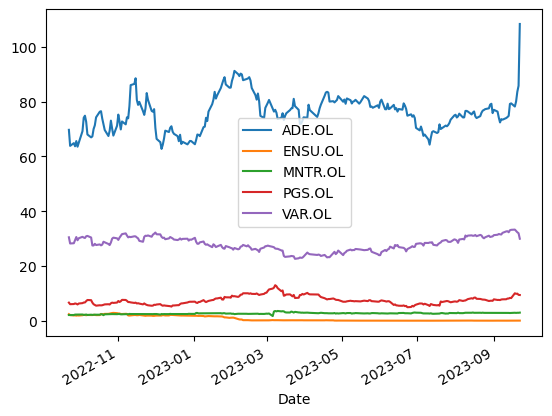

In [60]:
key = 'volume'
bottom = False

tickers = df[key].sort_values(ascending=bottom).dropna()[:5]

display(tickers)

yf.download(
    tickers.index.to_list(), 
    period='1Y'
)['Adj Close'].plot()

## Save dataframe

In [61]:
df.to_excel('stock_data.xlsx')